---

_You are currently looking at **version 0.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the Jupyter Notebook FAQ course resource._

---

# Assignment 1 - Introduction to Machine Learning

For this assignment, you will be using the Breast Cancer Wisconsin (Diagnostic) Database to create a classifier that can help diagnose patients. First, read through the description of the dataset (below).

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.DESCR) # Print the data set description

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

The object returned by `load_breast_cancer()` is a scikit-learn Bunch object, which is similar to a dictionary.

In [2]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Question 0 (Example)

How many features does the breast cancer dataset have?

*This function should return an integer.*

In [ ]:
# You should write your whole answer within the function provided. The autograder will call
# this function and compare the return value against the correct solution value
def answer_zero():
    # This function returns the number of features of the breast cancer dataset, which is an integer. 
    # The assignment question description will tell you the general format the autograder is expecting
    
    # YOUR CODE HERE
    
    return cancer.data.shape[1]
    raise NotImplementedError()

# You can examine what your function returns by calling it in the cell. If you have questions
# about the assignment formats, check out the discussion forums for any FAQs

In [8]:
print(answer_zero())

30


### Question 1

Scikit-learn works with lists, numpy arrays, scipy-sparse matrices, and pandas DataFrames, so converting the dataset to a DataFrame is not necessary for training this model. Using a DataFrame does however help make many things easier such as munging data, so let's practice creating a classifier with a pandas DataFrame. 



Convert the sklearn.dataset `cancer` to a DataFrame. 

*This function should return a `(569, 31)` DataFrame with * 

*columns = *

    ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension',
    'target']

*and index = *

    RangeIndex(start=0, stop=569, step=1)

In [ ]:
def answer_one():
    df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
    df['target'] = cancer.target
    
    return df
    raise NotImplementedError()

In [14]:
print(answer_one())

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

### Question 2
What is the class distribution? (i.e. how many instances of `malignant` and how many `benign`?)

*This function should return a Series named `target` of length 2 with integer values and index =* `['malignant', 'benign']`

In [ ]:
def answer_two():
    df = answer_one()

    # YOUR CODE HERE
    counts = df['target'].value_counts()
    counts.index = ['benign' if i == 1 else 'malignant' for i in counts.index]
    
    return counts.sort_index()
    raise NotImplementedError()

In [16]:
print(answer_two())


benign       357
malignant    212
Name: count, dtype: int64


### Question 3
Split the DataFrame into `X` (the data) and `y` (the labels).

*This function should return a tuple of length 2:* `(X, y)`*, where* 
* `X` *has shape* `(569, 30)`
* `y` *has shape* `(569,)`.

In [17]:
def answer_three():
    df = answer_one()
    # YOUR CODE HERE
    X = df.drop('target', axis=1)  
    y = df['target']          

    return (X, y)
    raise NotImplementedError()

In [18]:
print(answer_three())

(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  me

### Question 4
Using `train_test_split`, split `X` and `y` into training and test sets `(X_train, X_test, y_train, and y_test)`.

**Set the random number generator state to 0 using `random_state=0` to make sure your results match the autograder!**

*This function should return a tuple of length 4:* `(X_train, X_test, y_train, y_test)`*, where* 
* `X_train` *has shape* `(426, 30)`
* `X_test` *has shape* `(143, 30)`
* `y_train` *has shape* `(426,)`
* `y_test` *has shape* `(143,)`

In [ ]:
from sklearn.model_selection import train_test_split

def answer_four():
    X, y = answer_three()
    # YOUR CODE HERE
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    return (X_train, X_test, y_train, y_test)
    raise NotImplementedError()

In [20]:
print(answer_four())

(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
293       11.850         17.46           75.54      432.7          0.08372   
332       11.220         19.86           71.94      387.3          0.10540   
565       20.130         28.25          131.20     1261.0          0.09780   
278       13.590         17.84           86.24      572.3          0.07948   
489       16.690         20.20          107.10      857.6          0.07497   
..           ...           ...             ...        ...              ...   
277       18.810         19.98          120.90     1102.0          0.08923   
9         12.460         24.04           83.97      475.9          0.11860   
359        9.436         18.32           59.82      278.6          0.10090   
192        9.720         18.22           60.73      288.1          0.06950   
559       11.510         23.93           74.52      403.5          0.09261   

     mean compactness  mean concavity  mean concave points  me

### Question 5
Using KNeighborsClassifier, fit a k-nearest neighbors (knn) classifier with `X_train`, `y_train` and using one nearest neighbor (`n_neighbors = 1`).

*This function should return a `sklearn.neighbors.classification.KNeighborsClassifier`.

In [25]:
from sklearn.neighbors import KNeighborsClassifier

def answer_five():
   
    X_train, X_test, y_train, y_test = answer_four()
        
    # YOUR CODE HERE
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)

    return knn
    raise NotImplementedError()

In [26]:
knn = answer_five()

In [27]:
print(knn)

KNeighborsClassifier(n_neighbors=1)


### Question 6
Using your knn classifier, predict the class label using the mean value for each feature.

Hint: You can use `cancerdf.mean()[:-1].values.reshape(1, -1)` which gets the mean value for each feature, ignores the target column, and reshapes the data from 1 dimension to 2 (necessary for the precict method of KNeighborsClassifier).

In [28]:
def answer_six():
    knn = answer_five()
    # YOUR CODE HERE
    cancerdf = answer_one()
    mean_features = cancerdf.mean()[:-1].values.reshape(1, -1)
    prediction = knn.predict(mean_features)
    
    return prediction[0]
    raise NotImplementedError()

In [29]:
print(answer_six())

c:\Users\gvand\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


1


### Question 7
Using your knn classifier, predict the class labels for the test set `X_test`.

*This function should return a numpy array with shape `(143,)` and values either `0.0` or `1.0`.*

In [31]:
def answer_seven():
    knn = answer_five()
    # YOUR CODE HERE
    X_train, X_test, y_train, y_test = answer_four()
    predictions = knn.predict(X_test)

    return predictions
    raise NotImplementedError()

In [32]:
print(answer_seven())

[1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]


### Question 8
Find the score (mean accuracy) of your knn classifier using `X_test` and `y_test`.

*This function should return a float between 0 and 1*

In [33]:
def answer_eight():
    knn = answer_five()
    # YOUR CODE HERE
    X_train, X_test, y_train, y_test = answer_four()
    score = knn.score(X_test, y_test)

    return score
    raise NotImplementedError()

In [34]:
print(answer_eight())

0.916083916083916


### Optional plot

Try using the plotting function below to visualize the different predicition scores between train and test sets, as well as malignant and benign cells.

In [40]:
import matplotlib.pyplot as plt
import numpy as np

def accuracy_plot():
    # Obtener datos
    X_train, X_test, y_train, y_test = answer_four()

    # Crear figura y eje 3D
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Usamos tres características para los ejes
    ax.scatter(
        X_train['mean radius'],
        X_train['mean texture'],
        X_train['mean smoothness'],
        c=y_train,
        cmap='coolwarm',  # Colores para clases
        marker='o',
        s=60,
        alpha=0.7
    )

    # Etiquetas de los ejes
    ax.set_xlabel('Mean Radius')
    ax.set_ylabel('Mean Texture')
    ax.set_zlabel('Mean Smoothness')
    ax.set_title('3D Scatter Plot of Breast Cancer Data (Train Set)')
    plt.show()



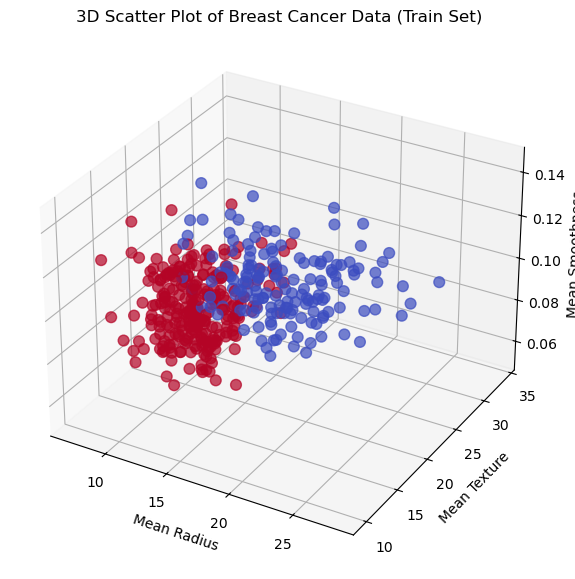

In [41]:
# Uncomment the plotting function to see the visualization, 
# Comment out the plotting function when submitting your notebook for grading

accuracy_plot() 